Iris Data Classification using a simple NN

In [63]:
import pandas as pd
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
import os
import tensorflow.keras as ks

W1230 16:15:00.363457  8700 deprecation.py:323] From C:\Users\himan\Anaconda3\lib\site-packages\tensorflow_core\python\compat\v2_compat.py:65: disable_resource_variables (from tensorflow.python.ops.variable_scope) is deprecated and will be removed in a future version.
Instructions for updating:
non-resource variables are not supported in the long term


In [64]:
#from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8"))

In [65]:
a=os.getcwd()
a

'C:\\Users\\himan\\Documents'

In [66]:
# Open the file for reading...
df = pd.read_csv('iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [67]:
#checking drop/null values check
df = df.drop(['Id'],axis=1)
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [68]:
df["Species"] = df["Species"].map({
    "Iris-setosa": 0,
    "Iris-versicolor": 1,
    "Iris-virginica": 2
}).astype(int)

In [69]:
x_train = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y_train = df['Species']

In [70]:
new_y = []
for i in y_train:
    a = [0,0,0]
    a[i] = 1
    new_y.append(a)   
    
columns = list(x_train)
X = pd.DataFrame.as_matrix(x_train,columns=columns)
Y = np.array(new_y)

C:\Users\himan\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [71]:
#flatten the features for feeding into network base layer

X_train_flatten = X.reshape(X.shape[0],-1).T
Y_train_flatten = Y.reshape(Y.shape[0],-1).T
print("No of training (X):"+str(X_train_flatten.shape))
print("No of training (X):"+str(Y_train_flatten.shape))

No of training (X):(4, 150)
No of training (X):(3, 150)


In [72]:
#(YY_train_flatten).shape

In [73]:
#Normalize 
XX_train_flatten = normalize(X_train_flatten)
YY_train_flatten = normalize(Y_train_flatten)

In [74]:
# creating the placeholders for X & Y 
def create_placeholders(n_x,n_y):
    
    X = tf.placeholder(shape=[n_x,None],dtype=tf.float32)
    Y = tf.placeholder(shape=[n_y,None],dtype=tf.float32)
    
    return X,Y

In [75]:
print(X.shape + Y.shape)

(150, 4, 150, 3)


In [76]:
#initialize paramete 
def initialize_parameters():
    
    W1 = tf.get_variable("W1",[2,4],initializer = tf.random_normal_initializer())#tf.contrib.layers.xavier_initializer())
    b1 = tf.get_variable("b1",[2,1],initializer = tf.zeros_initializer())
    W2 = tf.add(tf.math.scalar_mul(1.1,tf.get_variable("W2",[3,2],initializer = tf.random_uniform_initializer())),-0.1)#tf.contrib.layers.xavier_initializer())
    b2 = tf.get_variable("b2",[3,1],initializer = tf.zeros_initializer())
    
    parameters = {"W1":W1,
                  "b1":b1,
                  "W2":W2,
                  "b2":b2}
                  
    return parameters

In [77]:
#forward propogation
def forward_propagation(X, parameters):
    
    W1 = parameters['W1']
    b1 = parameters['b1']    
    W2 = parameters['W2']
    b2 = parameters['b2']

    Z1 = tf.add(tf.matmul(W1,X),b1)
    Z1 = tf.nn.relu(Z1)
    Z2 = tf.add(tf.matmul(W2,Z1),b2)
    return Z2

In [78]:
# compute function 
def compute_cost(Z2,Y):
    
    logits = tf.transpose(Z2)
    labels = tf.transpose(Y)
    
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits,labels=labels))
    
    return cost

def compute_accuracy(Z2,Y):
    
    correct_prediction = tf.equal(tf.argmax(Z2), tf.argmax(Y))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

    return accuracy


W1230 16:15:22.942051  8700 deprecation.py:323] From <ipython-input-78-5e90f7ef81c9>:7: softmax_cross_entropy_with_logits (from tensorflow.python.ops.nn_ops) is deprecated and will be removed in a future version.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



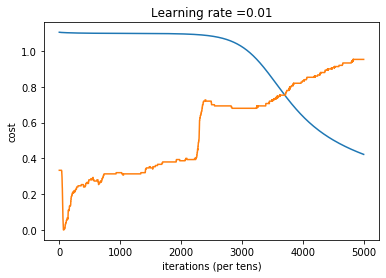

In [79]:
# Running the NN !! 
tf.reset_default_graph()
(n_x, m) = XX_train_flatten.shape       # shape of X                    
n_y = Y_train_flatten.shape[0]         # shape of Y
X, Y = create_placeholders(n_x,n_y)    # creating placeholder 
tf.set_random_seed(42)
p = initialize_parameters()            # initialize parameter 
Z6 = forward_propagation(X,p)          # forward prop
y_softmax = tf.nn.softmax(Z6)          # softmax function 
cost = compute_cost(Z6,Y)              # cost function 
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.05).minimize(cost)  # gradient descent, backprop, update,optimiz
accuracy = compute_accuracy(Z6,Y)
sess = tf.Session()
sess.run(tf.global_variables_initializer())    #initializae 
par = sess.run(p)
Y_pred = sess.run(Z6,feed_dict={X:XX_train_flatten})    #forward prop test 
cost_value = sess.run(cost,feed_dict={Z6:Y_pred,Y:Y_train_flatten})  #cost function test - First cost function 
costs =[]
accuracies = []
for i in range(0,5000):                # 2000 epoch !! 
    _,new_cost_value,new_acc_value = sess.run([optimizer, cost,accuracy], feed_dict={X: XX_train_flatten, Y: Y_train_flatten})
    costs.append(new_cost_value)
    accuracies += [new_acc_value]
    
p = sess.run(p)                        # parameter saving 
y_softmax = sess.run(y_softmax,feed_dict={X: XX_train_flatten})    # running softmax 

plt.plot(np.squeeze(costs))            # plot 
plt.plot(np.squeeze(accuracies))
plt.ylabel('cost')
plt.xlabel('iterations (per tens)')
plt.title("Learning rate =" + str(.01))
plt.show()        

In [80]:
#p

In [81]:
#y_softmax

In [82]:
#testing prediction !! 
correct_prediction = tf.equal(tf.argmax(y_softmax), tf.argmax(Y_train_flatten))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

print("the Accuracy is :"+str(sess.run(accuracy*100, feed_dict={X: XX_train_flatten, Y: Y_train_flatten})))

the Accuracy is :94.0


In [83]:
dx = (XX_train_flatten.max(1)-XX_train_flatten.min(1))/10000
dx[1:] = 0
#X_temp = X_train_flatten-width.reshape(-1,1)
#X_train_flatten

In [84]:
X_temp = XX_train_flatten+dx.reshape(-1,1)
Y_pred = sess.run(tf.nn.softmax(Z6),feed_dict={X:XX_train_flatten}).copy()
Y_temp = sess.run(tf.nn.softmax(Z6),feed_dict={X:X_temp}).copy()
dy = Y_temp-Y_pred
a=(dy/dx[0]).mean(1)

In [85]:
a

array([-4.5763116e-04, -1.8697927e-05,  3.8759408e-06], dtype=float32)

In [86]:
#initialize paramete 
def initialize_parameters_2():
    
    W1 = tf.get_variable("W1",[3,4],initializer = tf.zeros_initializer())#tf.contrib.layers.xavier_initializer())
    b1 = tf.get_variable("b1",[3,1],initializer = tf.zeros_initializer())

    
    para_2 = {"W1":W1,
                  "b1":b1}
                  
    return para_2

In [87]:
#forward propogation
def forward_propagation_2(X, parameters):
    
    W1 = parameters['W1']
    b1 = parameters['b1']

    Z1 = tf.add(tf.matmul(W1,X),b1)

    return Z1

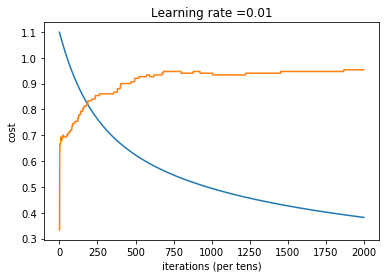

In [88]:
# Running the NN !! 
tf.reset_default_graph()
(n_x, m) = XX_train_flatten.shape       # shape of X                    
n_y = Y_train_flatten.shape[0]         # shape of Y
X, Y = create_placeholders(n_x,n_y)    # creating placeholder 
tf.set_random_seed(42)
p = initialize_parameters_2()            # initialize parameter 
Z6 = forward_propagation_2(X,p)          # forward prop
y_softmax = tf.nn.softmax(Z6)          # softmax function 
cost = compute_cost(Z6,Y)              # cost function
accuracy = compute_accuracy(Z6,Y)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=2.2).minimize(cost)  # gradient descent, backprop, update,optimiz
sess = tf.Session()
sess.run(tf.global_variables_initializer())    #initializae 
par = sess.run(p)
Y_pred = sess.run(Z6,feed_dict={X:XX_train_flatten})    #forward prop test 
cost_value = sess.run(cost,feed_dict={Z6:Y_pred,Y:Y_train_flatten})  #cost function test - First cost function 
costs =[]
accuracies = []
for i in range(0,2000):                # 2000 epoch !! 
    _,new_cost_value,new_acc_value = sess.run([optimizer, cost, accuracy], feed_dict={X: XX_train_flatten, Y: Y_train_flatten})
    costs.append(new_cost_value)
    accuracies += [new_acc_value]

p = sess.run(p)                        # parameter saving 
y_softmax = sess.run(y_softmax,feed_dict={X: XX_train_flatten})    # running softmax 

plt.plot(np.squeeze(costs))# plot
plt.plot(np.squeeze(accuracies))
plt.ylabel('cost')
plt.xlabel('iterations (per tens)')
plt.title("Learning rate =" + str(.01))
plt.show()        

In [89]:
#testing prediction !! 
correct_prediction = tf.equal(tf.argmax(y_softmax), tf.argmax(Y_train_flatten))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

print("the Accuracy is :"+str(sess.run(accuracy*100, feed_dict={X: XX_train_flatten, Y: Y_train_flatten})))

the Accuracy is :96.666664


In [90]:
dx = (X_train_flatten.max(1)-X_train_flatten.min(1))/10000
X_temp = X_train_flatten+dx.reshape(-1,1)
Y_pred = sess.run(tf.nn.softmax(Z6),feed_dict={X:X_train_flatten})
Y_temp = sess.run(tf.nn.softmax(Z6),feed_dict={X:X_temp})
dy = Y_temp-Y_pred
(dy/dx[0]).mean(1)
(dy/dx[0]).mean(1)
dy

array([[ 0.00000000e+00,  0.00000000e+00, -1.49157131e-10,
         0.00000000e+00,  0.00000000e+00, -3.05311332e-16,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -1.47792889e-12,  0.00000000e+00,
        -3.27418093e-11,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -2.67164069e-12,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -3.19744231e-14,  0.00000000e+00, -1.54498810e-18,
         0.00000000e+00,  0.00000000e+00, -7.07767178e-16,
         1.02318154e-12,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  8.87666829e-10,
         2.61934474e-10,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -1.77351467e-11, -5.77315973e-14,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -1.63424829e-13,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+0

In [91]:
X_temp = XX_train_flatten+dx.reshape(-1,1)
Y_pred = sess.run(tf.nn.softmax(Z6),feed_dict={X:XX_train_flatten}).copy()
Y_temp = sess.run(tf.nn.softmax(Z6),feed_dict={X:X_temp}).copy()
dy = Y_temp-Y_pred
b=(dy/dx[0]).mean(1)

In [92]:
b

array([-6.9168755e-07,  4.6566129e-07,  5.6051823e-07], dtype=float32)

In [93]:
a

array([-4.5763116e-04, -1.8697927e-05,  3.8759408e-06], dtype=float32)

In [94]:
abs(a-b)/b

array([-660.6155   ,   41.153492 ,    5.9149237], dtype=float32)